In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [16]:
MODEL_TYPE = 'test10'

# SDR, SI-SDR, SNR, SI-SNR

In [17]:
df_nonoise = pd.read_csv(f'result/{MODEL_TYPE}/NoNoise.csv')
df_general = pd.read_csv(f'result/{MODEL_TYPE}/general.csv')
df_resp = pd.read_csv(f'result/{MODEL_TYPE}/resp_support.csv')

df_nonoise_nmf = pd.read_csv(f'result/NMF model result/NoNoise.csv')
df_general_nmf = pd.read_csv(f'result/NMF model result/general.csv')
df_resp_nmf = pd.read_csv(f'result/NMF model result/resp_support.csv')

df_nonoise_nmcf = pd.read_csv(f'result/NMCF model result/NoNoise.csv')
df_general_nmcf = pd.read_csv(f'result/NMCF model result/general.csv')
df_resp_nmcf = pd.read_csv(f'result/NMCF model result/resp_support.csv')

In [18]:
nonoise_sdr_heart = df_nonoise['SDR improvement heart']
nonoise_sisdr_heart = df_nonoise['SI-SDR improvement heart']
nonoise_sdr_lung = df_nonoise['SDR improvement lung']
nonoise_sisdr_lung = df_nonoise['SI-SDR improvement lung']

general_sdr_heart = df_general['SDR improvement heart']
general_sisdr_heart = df_general['SI-SDR improvement heart']
general_sdr_lung = df_general['SDR improvement lung']
general_sisdr_lung = df_general['SI-SDR improvement lung']

resp_sdr_heart = df_resp['SDR improvement heart']
resp_sisdr_heart = df_resp['SI-SDR improvement heart']
resp_sdr_lung = df_resp['SDR improvement lung']
resp_sisdr_lung = df_resp['SI-SDR improvement lung']

In [19]:
nonoise_nmf_sdr_heart = df_nonoise_nmf['SDR improvement heart']
nonoise_nmf_sisdr_heart = df_nonoise_nmf['SI-SDR improvement heart']
nonoise_nmf_sdr_lung = df_nonoise_nmf['SDR improvement lung']
nonoise_nmf_sisdr_lung = df_nonoise_nmf['SI-SDR improvement lung']

general_nmf_sdr_heart = df_general_nmf['SDR improvement heart']
general_nmf_sisdr_heart = df_general_nmf['SI-SDR improvement heart']
general_nmf_sdr_lung = df_general_nmf['SDR improvement lung']
general_nmf_sisdr_lung = df_general_nmf['SI-SDR improvement lung']

resp_nmf_sdr_heart = df_resp_nmf['SDR improvement heart']
resp_nmf_sisdr_heart = df_resp_nmf['SI-SDR improvement heart']
resp_nmf_sdr_lung = df_resp_nmf['SDR improvement lung']
resp_nmf_sisdr_lung = df_resp_nmf['SI-SDR improvement lung']

In [20]:
nonoise_nmcf_sdr_heart = df_nonoise_nmcf['SDR improvement heart']
nonoise_nmcf_sisdr_heart = df_nonoise_nmcf['SI-SDR improvement heart']
nonoise_nmcf_sdr_lung = df_nonoise_nmcf['SDR improvement lung']
nonoise_nmcf_sisdr_lung = df_nonoise_nmcf['SI-SDR improvement lung']

general_nmcf_sdr_heart = df_general_nmcf['SDR improvement heart']
general_nmcf_sisdr_heart = df_general_nmcf['SI-SDR improvement heart']
general_nmcf_sdr_lung = df_general_nmcf['SDR improvement lung']
general_nmcf_sisdr_lung = df_general_nmcf['SI-SDR improvement lung']

resp_nmcf_sdr_heart = df_resp_nmcf['SDR improvement heart']
resp_nmcf_sisdr_heart = df_resp_nmcf['SI-SDR improvement heart']
resp_nmcf_sdr_lung = df_resp_nmcf['SDR improvement lung']
resp_nmcf_sisdr_lung = df_resp_nmcf['SI-SDR improvement lung']

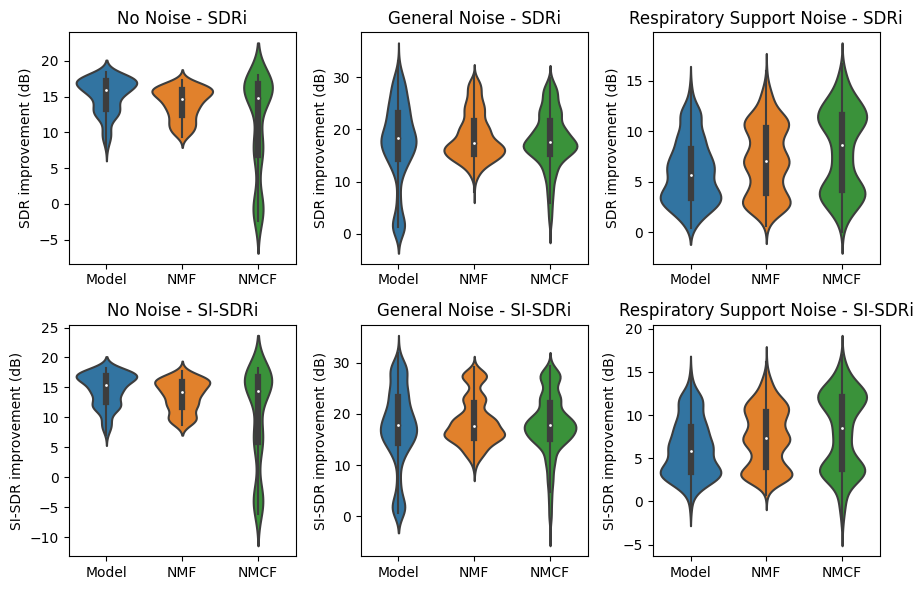

In [21]:
def calc_pval(df1, df2):
    return ttest_ind(df1.to_numpy(), df2.to_numpy()).pvalue
scale = 3
fig = plt.figure(figsize=(3*scale, 2*scale))
grid = fig.add_gridspec(2, 3)

ax = fig.add_subplot(grid[0, 0])
sns.violinplot(data=[nonoise_sdr_heart, nonoise_nmf_sdr_heart, nonoise_nmcf_sdr_heart])
pval = max(calc_pval(nonoise_sdr_heart, nonoise_nmf_sdr_heart), calc_pval(nonoise_sdr_heart, nonoise_nmcf_sdr_heart))
ax.set_ylabel('SDR improvement (dB)')
# ax.set_title(f'No Noise - SDRi (p-val: {pval:.2})')
ax.set_title(f'No Noise - SDRi')
ax.set_xticklabels(['Model','NMF','NMCF'])

ax = fig.add_subplot(grid[0, 2])
sns.violinplot(data=[resp_sdr_heart, resp_nmf_sdr_heart, resp_nmcf_sdr_heart])
pval = max(calc_pval(resp_sdr_heart, resp_nmf_sdr_heart), calc_pval(resp_sdr_heart, resp_nmcf_sdr_heart))
ax.set_ylabel('SDR improvement (dB)')
# ax.set_title(f'Resp - SDRi (p-val: {pval:.2})')
ax.set_title(f'Respiratory Support Noise - SDRi')
ax.set_xticklabels(['Model','NMF','NMCF'])

ax = fig.add_subplot(grid[0, 1])
sns.violinplot(data=[general_sdr_heart, general_nmf_sdr_heart, general_nmcf_sdr_heart])
pval = max(calc_pval(general_sdr_heart, general_nmf_sdr_heart), calc_pval(general_sdr_heart, general_nmcf_sdr_heart))
ax.set_ylabel('SDR improvement (dB)')
# ax.set_title(f'General - SDRi (p-val: {pval:.2})')
ax.set_title(f'General Noise - SDRi')
ax.set_xticklabels(['Model','NMF','NMCF'])

ax = fig.add_subplot(grid[1, 0])
sns.violinplot(data=[nonoise_sisdr_heart, nonoise_nmf_sisdr_heart, nonoise_nmcf_sisdr_heart])
pval = max(calc_pval(nonoise_sisdr_heart, nonoise_nmf_sisdr_heart), calc_pval(nonoise_sisdr_heart, nonoise_nmcf_sisdr_heart))
ax.set_ylabel('SI-SDR improvement (dB)')
# ax.set_title(f'No Noise - SISDRi (p-val: {pval:.2})')
ax.set_title(f'No Noise - SI-SDRi')
ax.set_xticklabels(['Model','NMF','NMCF'])

ax = fig.add_subplot(grid[1, 2])
sns.violinplot(data=[resp_sisdr_heart, resp_nmf_sisdr_heart, resp_nmcf_sisdr_heart])
pval = max(calc_pval(resp_sisdr_heart, resp_nmf_sisdr_heart), calc_pval(resp_sisdr_heart, resp_nmcf_sisdr_heart))
ax.set_ylabel('SI-SDR improvement (dB)')
# ax.set_title(f'Resp - SISDRi - (p-val: {pval:.2})')
ax.set_title(f'Respiratory Support Noise - SI-SDRi')
ax.set_xticklabels(['Model','NMF','NMCF'])

ax = fig.add_subplot(grid[1, 1])
sns.violinplot(data=[general_sisdr_heart, general_nmf_sisdr_heart, general_nmcf_sisdr_heart])
pval = max(calc_pval(general_sisdr_heart, general_nmf_sisdr_heart), calc_pval(general_sisdr_heart, general_nmcf_sisdr_heart))
ax.set_ylabel('SI-SDR improvement (dB)')
# ax.set_title(f'General - SISDRi (p-val: {pval:.2})')
ax.set_title(f'General Noise - SI-SDRi')
ax.set_xticklabels(['Model','NMF','NMCF'])

plt.tight_layout()
plt.show()

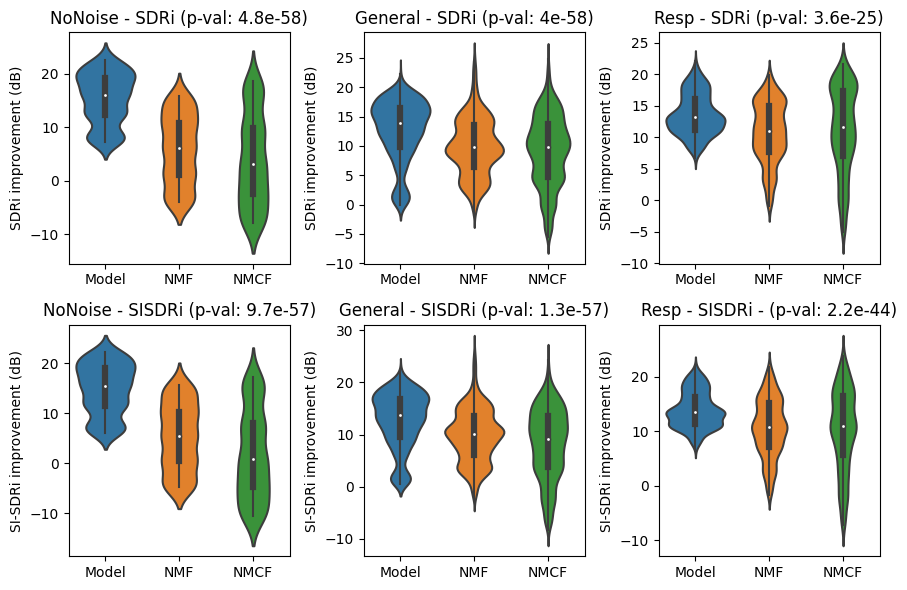

In [22]:
fig = plt.figure(figsize=(3*scale, 2*scale))
grid = fig.add_gridspec(2, 3)

ax = fig.add_subplot(grid[0, 0])
sns.violinplot(data=[nonoise_sdr_lung, nonoise_nmf_sdr_lung, nonoise_nmcf_sdr_lung])
pval = max(calc_pval(nonoise_sdr_lung, nonoise_nmf_sdr_lung), calc_pval(nonoise_sdr_lung, nonoise_nmcf_sdr_lung))
ax.set_ylabel('SDRi improvement (dB)')
ax.set_title(f'NoNoise - SDRi (p-val: {pval:.2})')
ax.set_xticklabels(['Model','NMF','NMCF'])

ax = fig.add_subplot(grid[0, 2])
sns.violinplot(data=[resp_sdr_lung, resp_nmf_sdr_lung, resp_nmcf_sdr_lung])
pval = max(calc_pval(resp_sdr_lung, resp_nmf_sdr_lung), calc_pval(resp_sdr_lung, resp_nmcf_sdr_lung))
ax.set_ylabel('SDRi improvement (dB)')
ax.set_title(f'Resp - SDRi (p-val: {pval:.2})')
ax.set_xticklabels(['Model','NMF','NMCF'])

ax = fig.add_subplot(grid[0, 1])
sns.violinplot(data=[general_sdr_lung, general_nmf_sdr_lung, general_nmcf_sdr_lung])
pval = max(calc_pval(general_sdr_lung, general_nmf_sdr_lung), calc_pval(general_sdr_lung, general_nmcf_sdr_lung))
ax.set_ylabel('SDRi improvement (dB)')
ax.set_title(f'General - SDRi (p-val: {pval:.2})')
ax.set_xticklabels(['Model','NMF','NMCF'])

ax = fig.add_subplot(grid[1, 0])
sns.violinplot(data=[nonoise_sisdr_lung, nonoise_nmf_sisdr_lung, nonoise_nmcf_sisdr_lung])
pval = max(calc_pval(nonoise_sisdr_lung, nonoise_nmf_sisdr_lung), calc_pval(nonoise_sisdr_lung, nonoise_nmcf_sisdr_lung))
ax.set_ylabel('SI-SDRi improvement (dB)')
ax.set_title(f'NoNoise - SISDRi (p-val: {pval:.2})')
ax.set_xticklabels(['Model','NMF','NMCF'])

ax = fig.add_subplot(grid[1, 2])
sns.violinplot(data=[resp_sisdr_lung, resp_nmf_sisdr_lung, resp_nmcf_sisdr_lung])
pval = max(calc_pval(resp_sisdr_lung, resp_nmf_sisdr_lung), calc_pval(resp_sisdr_lung, resp_nmcf_sisdr_lung))
ax.set_ylabel('SI-SDRi improvement (dB)')
ax.set_title(f'Resp - SISDRi - (p-val: {pval:.2})')
ax.set_xticklabels(['Model','NMF','NMCF'])

ax = fig.add_subplot(grid[1, 1])
sns.violinplot(data=[general_sisdr_lung, general_nmf_sisdr_lung, general_nmcf_sisdr_lung])
pval = max(calc_pval(general_sisdr_lung, general_nmf_sisdr_lung), calc_pval(general_sisdr_lung, general_nmcf_sisdr_lung))
ax.set_ylabel('SI-SDRi improvement (dB)')
ax.set_title(f'General - SISDRi (p-val: {pval:.2})')
ax.set_xticklabels(['Model','NMF','NMCF'])

plt.tight_layout()
plt.show()

# Table

In [23]:
data = [[None]*9 for _ in range(2)]
column_names = pd.DataFrame([
    ['NoNoise', 'Model'],
    ['NoNoise', 'NMF'],
    ['NoNoise', 'NMCF'],
    ['General', 'Model'],
    ['General', 'NMF'],
    ['General', 'NMCF'],
    ['Resp', 'Model'],
    ['Resp', 'NMF'],
    ['Resp', 'NMCF'],
], columns=["Noise Type", "Methods"])
columns = pd.MultiIndex.from_frame(column_names)

In [24]:
data[0][0] = nonoise_sdr_heart.median()
data[0][1] = nonoise_nmf_sdr_heart.median()
data[0][2] = nonoise_nmcf_sdr_heart.median()
data[0][3] = general_sdr_heart.median()
data[0][4] = general_nmf_sdr_heart.median()
data[0][5] = general_nmcf_sdr_heart.median()
data[0][6] = resp_sdr_heart.median()
data[0][7] = resp_nmf_sdr_heart.median()
data[0][8] = resp_nmcf_sdr_heart.median()

data[1][0] = nonoise_sisdr_heart.median()
data[1][1] = nonoise_nmf_sisdr_heart.median()
data[1][2] = nonoise_nmcf_sisdr_heart.median()
data[1][3] = general_sisdr_heart.median()
data[1][4] = general_nmf_sisdr_heart.median()
data[1][5] = general_nmcf_sisdr_heart.median()
data[1][6] = resp_sisdr_heart.median()
data[1][7] = resp_nmf_sisdr_heart.median()
data[1][8] = resp_nmcf_sisdr_heart.median()

In [25]:
df = pd.DataFrame(data, columns=columns, index=['SDR', 'SI-SDR'])
df = df.style.format(precision=2)
display(df)

In [26]:
print(df.to_latex())

\begin{tabular}{lrrrrrrrrr}
Noise Type & \multicolumn{3}{r}{NoNoise} & \multicolumn{3}{r}{General} & \multicolumn{3}{r}{Resp} \\
Methods & Model & NMF & NMCF & Model & NMF & NMCF & Model & NMF & NMCF \\
SDR & 15.94 & 14.64 & 14.85 & 18.32 & 17.42 & 17.57 & 5.66 & 7.04 & 8.67 \\
SI-SDR & 15.40 & 14.23 & 14.36 & 17.79 & 17.60 & 17.80 & 5.86 & 7.30 & 8.53 \\
\end{tabular}



In [27]:
data[0][0] = nonoise_sdr_lung.median()
data[0][1] = nonoise_nmf_sdr_lung.median()
data[0][2] = nonoise_nmcf_sdr_lung.median()
data[0][3] = general_sdr_lung.median()
data[0][4] = general_nmf_sdr_lung.median()
data[0][5] = general_nmcf_sdr_lung.median()
data[0][6] = resp_sdr_lung.median()
data[0][7] = resp_nmf_sdr_lung.median()
data[0][8] = resp_nmcf_sdr_lung.median()

data[1][0] = nonoise_sisdr_lung.median()
data[1][1] = nonoise_nmf_sisdr_lung.median()
data[1][2] = nonoise_nmcf_sisdr_lung.median()
data[1][3] = general_sisdr_lung.median()
data[1][4] = general_nmf_sisdr_lung.median()
data[1][5] = general_nmcf_sisdr_lung.median()
data[1][6] = resp_sisdr_lung.median()
data[1][7] = resp_nmf_sisdr_lung.median()
data[1][8] = resp_nmcf_sisdr_lung.median()

In [28]:
df = pd.DataFrame(data, columns=columns, index=['SDR', 'SI-SDR'])
df = df.style.format(precision=2)
display(df)

In [29]:
print(df.to_latex())

\begin{tabular}{lrrrrrrrrr}
Noise Type & \multicolumn{3}{r}{NoNoise} & \multicolumn{3}{r}{General} & \multicolumn{3}{r}{Resp} \\
Methods & Model & NMF & NMCF & Model & NMF & NMCF & Model & NMF & NMCF \\
SDR & 16.07 & 6.14 & 3.07 & 13.89 & 9.81 & 9.72 & 13.21 & 11.02 & 11.68 \\
SI-SDR & 15.45 & 5.40 & 0.74 & 13.68 & 10.19 & 9.12 & 13.46 & 10.79 & 10.93 \\
\end{tabular}



# STFT Stuff

In [30]:
data = [[None]*6 for _ in range(2)]
column_names = pd.DataFrame([
    ['Heart', 'STFT Model'],
    ['Heart', 'NMF'],
    ['Heart', 'NMCF'],
    ['Lung', 'STFT Model'],
    ['Lung', 'NMF'],
    ['Lung', 'NMCF'],
], columns=["Resp Support Noise", "Methods"])
columns = pd.MultiIndex.from_frame(column_names)

In [31]:
data[0][0] = resp_sdr_heart.median()
data[0][1] = resp_nmf_sdr_heart.median()
data[0][2] = resp_nmcf_sdr_heart.median()
data[0][3] = resp_sdr_lung.median()
data[0][4] = resp_nmf_sdr_lung.median()
data[0][5] = resp_nmcf_sdr_lung.median()

data[1][0] = resp_sisdr_heart.median()
data[1][1] = resp_nmf_sisdr_heart.median()
data[1][2] = resp_nmcf_sisdr_heart.median()
data[1][3] = resp_sisdr_lung.median()
data[1][4] = resp_nmf_sisdr_lung.median()
data[1][5] = resp_nmcf_sisdr_lung.median()

In [32]:
df = pd.DataFrame(data, columns=columns, index=['SDR', 'SI-SDR'])
df = df.style.format(precision=2)
display(df)

In [33]:
print(df.to_latex())

\begin{tabular}{lrrrrrr}
Resp Support Noise & \multicolumn{3}{r}{Heart} & \multicolumn{3}{r}{Lung} \\
Methods & STFT Model & NMF & NMCF & STFT Model & NMF & NMCF \\
SDR & 5.66 & 7.04 & 8.67 & 13.21 & 11.02 & 11.68 \\
SI-SDR & 5.86 & 7.30 & 8.53 & 13.46 & 10.79 & 10.93 \\
\end{tabular}



# HR and BR

In [54]:
hrbr = pd.read_csv(f'result/{MODEL_TYPE}/hrbr.csv').astype({'HR improvement':'float', 'BR improvement':'float'})
hrbr_nmf = pd.read_csv(f'result/NMF model result/hrbr.csv').astype({'HR improvement':'float', 'BR improvement':'float'})
hrbr_nmcf = pd.read_csv(f'result/NMCF model result/hrbr.csv').astype({'HR improvement':'float', 'BR improvement':'float'})

data = [[], [], []]
# column_names = pd.DataFrame([["HR improvement - Nil", "mean"], 
#                              ["HR improvement - Nil", "median"], 
#                              ["HR improvement - Nil", "std"], 
#                              ["HR improvement - Resp", "mean"], 
#                              ["HR improvement - Resp", "median"], 
#                              ["HR improvement - Resp", "std"]], 
#                              columns=["Method", ""])
column_names = pd.DataFrame([["BR improvement - Nil", "mean"], 
                             ["BR improvement - Nil", "median"], 
                             ["BR improvement - Nil", "std"], 
                             ["BR improvement - Resp", "mean"], 
                             ["BR improvement - Resp", "median"], 
                             ["BR improvement - Resp", "std"]], 
                             columns=["Method", ""])
columns = pd.MultiIndex.from_frame(column_names)

In [55]:
df_nil = hrbr.drop(hrbr[hrbr['Resp Support']==1].index)
df_resp = hrbr.drop(hrbr[hrbr['Resp Support']==0].index)

df_nil_nmf = hrbr_nmf.drop(hrbr_nmf[hrbr_nmf['Resp Support']==1].index)
df_resp_nmf = hrbr_nmf.drop(hrbr_nmf[hrbr_nmf['Resp Support']==0].index)

df_nil_nmcf = hrbr_nmcf.drop(hrbr_nmcf[hrbr_nmcf['Resp Support']==1].index)
df_resp_nmcf = hrbr_nmcf.drop(hrbr_nmcf[hrbr_nmcf['Resp Support']==0].index)

In [56]:
# mean = df_nil['HR improvement'].mean()
# median = df_nil['HR improvement'].median()
# var = df_nil['HR improvement'].std()
# data[0].extend([mean, median, var])

# mean = df_resp['HR improvement'].mean()
# median = df_resp['HR improvement'].median()
# var = df_resp['HR improvement'].std()
# data[0].extend([mean, median, var])

mean = df_nil['BR improvement'].mean()
median = df_nil['BR improvement'].median()
var = df_nil['BR improvement'].std()
data[0].extend([mean, median, var])

mean = df_resp['BR improvement'].mean()
median = df_resp['BR improvement'].median()
var = df_resp['BR improvement'].std()
data[0].extend([mean, median, var])

In [57]:
# mean = df_nil_nmf['HR improvement'].mean()
# median = df_nil_nmf['HR improvement'].median()
# var = df_nil_nmf['HR improvement'].std()
# data[1].extend([mean, median, var])

# mean = df_resp_nmf['HR improvement'].mean()
# median = df_resp_nmf['HR improvement'].median()
# var = df_resp_nmf['HR improvement'].std()
# data[1].extend([mean, median, var])

mean = df_nil_nmf['BR improvement'].mean()
median = df_nil_nmf['BR improvement'].median()
var = df_nil_nmf['BR improvement'].std()
data[1].extend([mean, median, var])

mean = df_resp_nmf['BR improvement'].mean()
median = df_resp_nmf['BR improvement'].median()
var = df_resp_nmf['BR improvement'].std()
data[1].extend([mean, median, var])

In [58]:
# mean = df_nil_nmcf['HR improvement'].mean()
# median = df_nil_nmcf['HR improvement'].median()
# var = df_nil_nmcf['HR improvement'].std()
# data[2].extend([mean, median, var])

# mean = df_resp_nmcf['HR improvement'].mean()
# median = df_resp_nmcf['HR improvement'].median()
# var = df_resp_nmcf['HR improvement'].std()
# data[2].extend([mean, median, var])

mean = df_nil_nmcf['BR improvement'].mean()
median = df_nil_nmcf['BR improvement'].median()
var = df_nil_nmcf['BR improvement'].std()
data[2].extend([mean, median, var])

mean = df_resp_nmcf['BR improvement'].mean()
median = df_resp_nmcf['BR improvement'].median()
var = df_resp_nmcf['BR improvement'].std()
data[2].extend([mean, median, var])

In [59]:
df = pd.DataFrame(data, columns=columns, index=['Model', 'NMF', 'NMCF'])
df = df.style.format(precision=2)
display(df)

In [60]:
print(df.to_latex())

\begin{tabular}{lrrrrrr}
Method & \multicolumn{3}{r}{BR improvement - Nil} & \multicolumn{3}{r}{BR improvement - Resp} \\
 & mean & median & std & mean & median & std \\
Model & 1.89 & 0.00 & 6.45 & 0.10 & 0.00 & 6.15 \\
NMF & 1.45 & 0.00 & 10.44 & -1.04 & 0.00 & 8.01 \\
NMCF & 1.27 & 0.00 & 11.64 & -1.30 & 0.00 & 8.43 \\
\end{tabular}



In [20]:
def confidence_band(x:np.ndarray, y:np.ndarray, ax, label:str = '', std_scale:float=1.96):
    # sort for plotting
    idx = x.argsort()
    x = x[idx]
    y = y[idx]

    a, b = np.polyfit(x, y, deg=1)
    y_est = a*x+b
    y_err = std_scale*(y-y_est).std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))

    # fig, ax = plt.subplots()
    baseline, = ax.plot(x, y_est, '-')
    ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.5, facecolor=baseline.get_color())
    ax.scatter(x, y, s=3, color=baseline.get_color(), label=label)

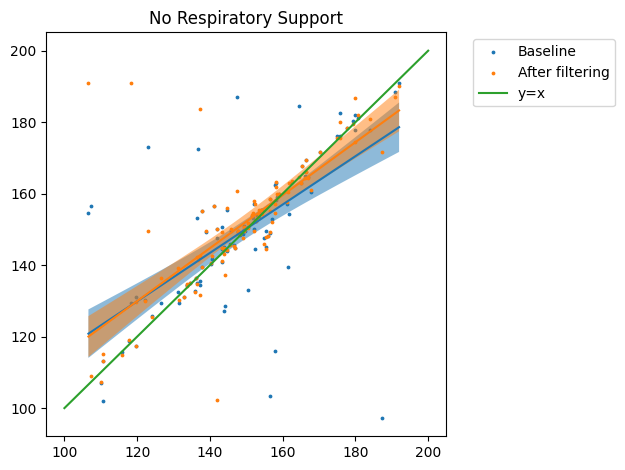

In [21]:
fig, ax = plt.subplots()
confidence_band(df_nil['Truth HR'].to_numpy(), df_nil['Baseline HR'].to_numpy(), ax, label='Baseline')
confidence_band(df_nil['Truth HR'].to_numpy(), df_nil['Predict HR'].to_numpy(), ax, label='After filtering')
plt.plot([100, 200], [100, 200], label='y=x')
plt.title('No Respiratory Support')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

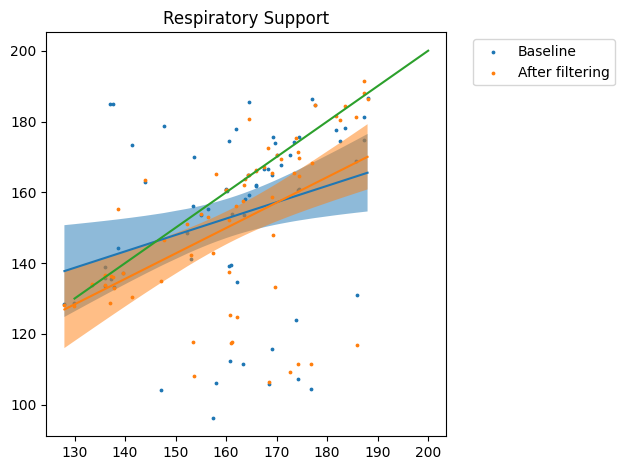

In [22]:
# sns.regplot(data=df_resp, x='Truth HR', y='Baseline HR', label='Baseline', scatter_kws={'s':3}, x_ci=100, robust=True)
# sns.regplot(data=df_resp, x='Truth HR', y='HR extrapolated', label='After filtering (extrapolated)', scatter_kws={'s':3}, x_ci=100, robust=True)
# sns.regplot(data=df_resp, x='Truth HR', y='Predict HR', label='After filtering', scatter_kws={'s':3}, x_ci=99, robust=True)
fig, ax = plt.subplots()
confidence_band(df_resp['Truth HR'].to_numpy(), df_resp['Baseline HR'].to_numpy(), ax, label='Baseline')
confidence_band(df_resp['Truth HR'].to_numpy(), df_resp['Predict HR'].to_numpy(), ax, label='After filtering')
plt.plot([130, 200], [130, 200])
plt.title('Respiratory Support')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

# Transfer function

In [6]:
from typing import Optional
import torch
import torchaudio
import os
from utils import load_model, bandpass_filter

def transfer_function(model_path:str, model_config:str, 
                      samples:Optional[list]=None, 
                      device:Optional[torch.device]=None):
    from scipy.fft import fft, fftfreq
    from scipy.signal.windows import hamming
    
    if device is None:
        device = torch.device('cpu')
    if samples is None:
        noises = ['CPAP', 'Bubble', 'Stmv']
        filenames = range(1,51)
        samples = [os.path.join(r'C:\Users\ypoh0004\Documents\Data\Evaluation Set 2', f'{noise}1', f'{filename}.wav') for noise in noises for filename in filenames]

    # load model
    model = load_model(model_path, model_config, device)
    model.eval()
    n_sample = 8_000
    heart_tf = np.zeros(n_sample)
    lung_tf = np.zeros(n_sample)
    for audio_path in samples:
        mixture, fs = torchaudio.load(audio_path, normalize=True)
        mixture = torch.unsqueeze(mixture, dim=0)
        with torch.no_grad():
            filtered_sound:torch.Tensor = model(mixture)
        heart = filtered_sound[0, 0, :].detach().cpu()
        lung = filtered_sound[0, 1, :].detach().cpu()

        mixture = np.squeeze(mixture.numpy())
        heart = np.squeeze(heart.numpy())
        lung = np.squeeze(lung.numpy())

        w = hamming(40000)
        inputfft = fft(mixture*w, n=n_sample)
        heartfft = fft(heart*w, n=n_sample)
        lungfft = fft(lung*w, n=n_sample)
        heart_tf += np.abs(heartfft)
        lung_tf += np.abs(lungfft)
    heart_tf /= len(samples)
    lung_tf /= len(samples)
    xf = fftfreq(n_sample, 1/fs)[:n_sample//2]
    return xf, heart_tf[:n_sample//2], lung_tf[:n_sample//2]

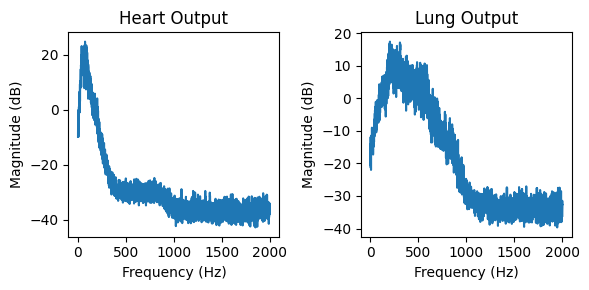

In [9]:
model_path = f'C:\\Users\\ypoh0004\\Documents\\Model\\{MODEL_TYPE}\\model_best.pt'
model_config = f'C:\\Users\\ypoh0004\\Documents\\Model\\{MODEL_TYPE}\\model.yaml'
xf, heart_tf, lung_tf = transfer_function(model_path, model_config)

scale=3
fig = plt.figure(figsize=(2*scale, scale))
grid = fig.add_gridspec(1, 2)

ax = fig.add_subplot(grid[0, 0])
ax.plot(xf, 20*np.log10(heart_tf))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude (dB)')
ax.set_title('Heart Output')

ax = fig.add_subplot(grid[0, 1])
ax.plot(xf, 20*np.log10(lung_tf))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude (dB)')
ax.set_title('Lung Output')

plt.tight_layout()
plt.show()

# Waveform Analysis

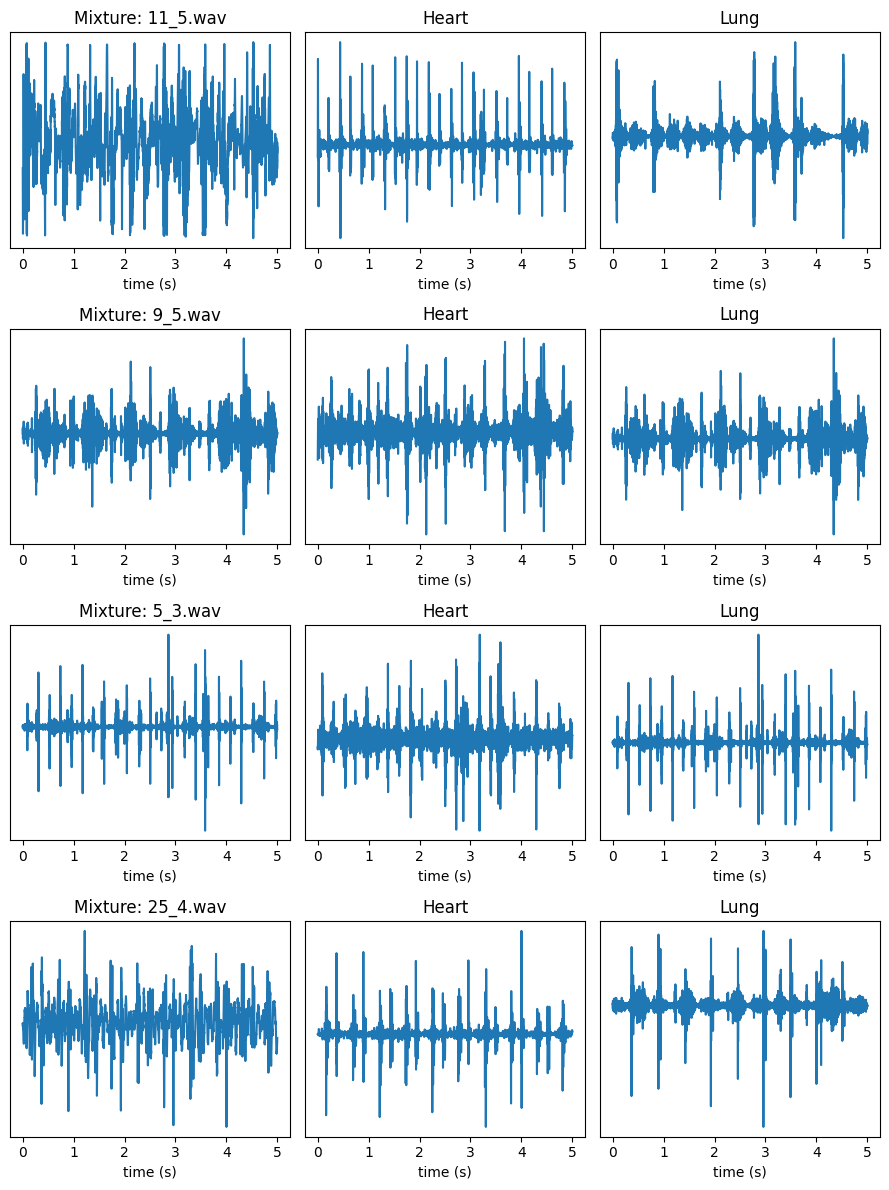

In [15]:
import os
import torchaudio
from utils import generate_output

model_path = f'C:\\Users\\ypoh0004\\Documents\\Model\\{MODEL_TYPE}\\model_best.pt'
model_config = f'C:\\Users\\ypoh0004\\Documents\\Model\\{MODEL_TYPE}\\model.yaml'
audio_path_base = r'C:\Users\ypoh0004\Documents\Data\Sync Dataset\Data\Audio Files\Sync Segmented (Ethan)'
samples = [('11_5.wav', 'Nil'), ('9_5.wav', 'Nil'), ('5_3.wav', 'CPAP'), ('25_4.wav', 'Nil')]

scale=3
fig = plt.figure(figsize=(scale*3, scale*len(samples)))
grid = fig.add_gridspec(len(samples), 3)

for idx, (sample, noise) in enumerate(samples):
    audio_path = os.path.join(audio_path_base, noise, sample)
    mixture, fs = torchaudio.load(audio_path, normalize=True)
    heart, lung = generate_output(mixture, model_path, model_config, bandpass=True)

    mixture = np.squeeze(mixture.numpy())
    heart = np.squeeze(heart.numpy())
    lung = np.squeeze(lung.numpy())

    mixture = mixture[:20_000]
    heart = heart[:20_000]
    lung = lung[:20_000]
    
    ts = np.arange(len(mixture))/fs

    ax = fig.add_subplot(grid[idx, 0])
    ax.plot(ts, mixture)
    ax.set_xlabel('time (s)')
    # ax.set_ylabel('Waveform')
    ax.set_yticks([])
    ax.set_title(f'Mixture: {sample}')

    ax = fig.add_subplot(grid[idx, 1])
    ax.plot(ts, heart)
    ax.set_xlabel('time (s)')
    # ax.set_ylabel('Waveform')
    ax.set_yticks([])
    ax.set_title('Heart')

    ax = fig.add_subplot(grid[idx, 2])
    ax.plot(ts, lung)
    ax.set_xlabel('time (s)')
    # ax.set_ylabel('Waveform')
    ax.set_yticks([])
    ax.set_title('Lung')
plt.tight_layout()
plt.show()

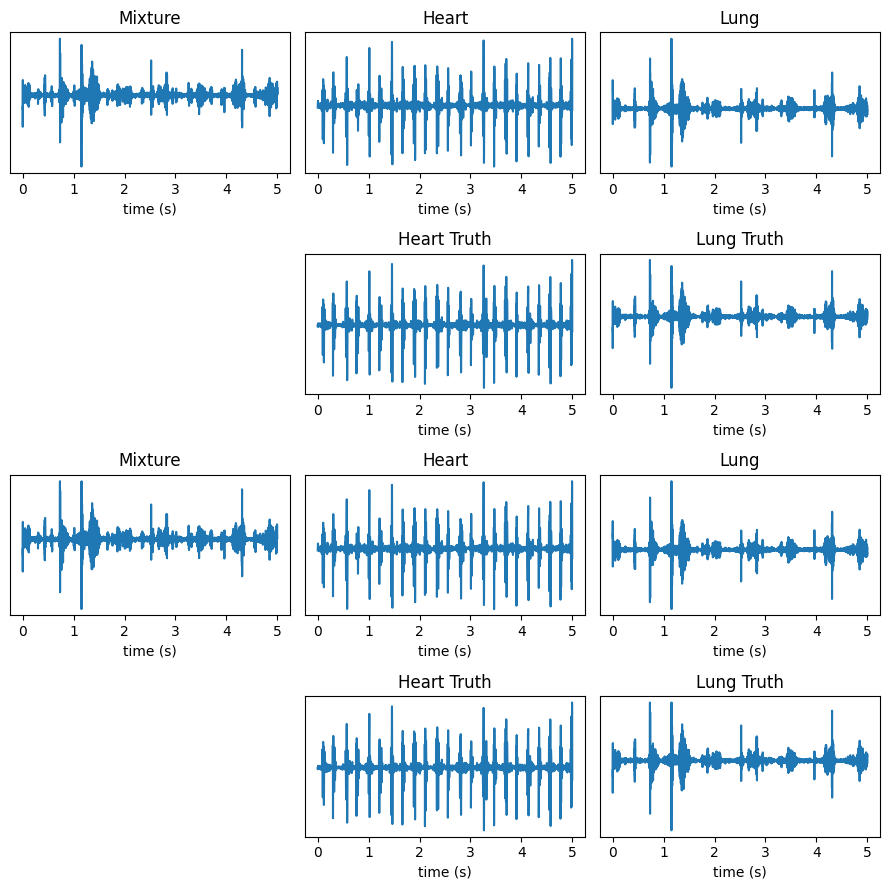

In [40]:
import torch
from hlsdata import HLSWav
from torch.utils.data import DataLoader
from utils import load_model

MODEL_TYPE='all1'

model_path = f'C:\\Users\\ypoh0004\\Documents\\Model\\{MODEL_TYPE}\\model_best.pt'
model_config = f'C:\\Users\\ypoh0004\\Documents\\Model\\{MODEL_TYPE}\\model.yaml'
device = torch.device('cpu')

# load model
model = load_model(model_path, model_config, device)
model.eval()

# generate samples
eval_dir = r'C:\Users\ypoh0004\Documents\Data\Evaluation Set 2'
noise_type = 'NoNoise'
test_data = HLSWav(eval_dir, 1,noise_type,2,2, preprocess=True)
test_dataloader = DataLoader(test_data, batch_size=4, shuffle=True, num_workers=4, pin_memory=True)
mix, target, _, _  = next(iter(test_dataloader))
with torch.no_grad():
    filtered_sounds:torch.Tensor = model(mix)   # (B, 2, T)

mix = mix.detach().cpu().numpy()
filtered_sounds = filtered_sounds.detach().cpu().numpy()
target = target.detach().cpu().numpy()

total = 2
scale=3
plt.figure(figsize=(scale*3, scale*total*1.5))
for idx in range(total):
    mixture = mix[idx, 0, :]
    heart = filtered_sounds[idx, 0, :]
    lung = filtered_sounds[idx, 1, :]
    heart_truth = target[idx, 0, :]
    lung_truth = target[idx, 1, :]

    mixture = mixture[:20_000]
    heart = heart[:20_000]
    lung = lung[:20_000]
    heart_truth = heart_truth[:20_000]
    lung_truth = lung_truth[:20_000]
    ts = np.arange(20_000)/4_000

    plt.subplot(2*total, 3, idx*6+1)
    plt.plot(ts, mixture)
    plt.xlabel('time (s)')
    # ax.set_ylabel('Waveform')
    plt.yticks([])
    plt.title(f'Mixture')

    plt.subplot(2*total, 3, idx*6+2)
    plt.plot(ts, heart)
    plt.xlabel('time (s)')
    # ax.set_ylabel('Waveform')
    plt.yticks([])
    plt.title('Heart')

    plt.subplot(2*total, 3, idx*6+3)
    plt.plot(ts, lung)
    plt.xlabel('time (s)')
    # ax.set_ylabel('Waveform')
    plt.yticks([])
    plt.title('Lung')

    plt.subplot(2*total, 3, idx*6+5)
    plt.plot(ts, heart_truth)
    plt.xlabel('time (s)')
    # ax.set_ylabel('Waveform')
    plt.yticks([])
    plt.title('Heart Truth')

    plt.subplot(2*total, 3, idx*6+6)
    plt.plot(ts, lung_truth)
    plt.xlabel('time (s)')
    # ax.set_ylabel('Waveform')
    plt.yticks([])
    plt.title('Lung Truth')

plt.tight_layout()
plt.show()

# Ablative study

In [1]:
from utils import count_parameters, load_model
import pandas as pd
import os
import torch

def extract_result(model_type):
    def average(lst):
        return sum(lst)/len(lst)
    df_nonoise = pd.read_csv(f'result/{model_type}/NoNoise.csv')
    df_general = pd.read_csv(f'result/{model_type}/general.csv')
    df_resp = pd.read_csv(f'result/{model_type}/resp_support.csv')

    nonoise_sdr_heart = df_nonoise['SDR improvement heart']
    nonoise_sisdr_heart = df_nonoise['SI-SDR improvement heart']
    nonoise_sdr_lung = df_nonoise['SDR improvement lung']
    nonoise_sisdr_lung = df_nonoise['SI-SDR improvement lung']

    general_sdr_heart = df_general['SDR improvement heart']
    general_sisdr_heart = df_general['SI-SDR improvement heart']
    general_sdr_lung = df_general['SDR improvement lung']
    general_sisdr_lung = df_general['SI-SDR improvement lung']

    resp_sdr_heart = df_resp['SDR improvement heart']
    resp_sisdr_heart = df_resp['SI-SDR improvement heart']
    resp_sdr_lung = df_resp['SDR improvement lung']
    resp_sisdr_lung = df_resp['SI-SDR improvement lung']

    return average([nonoise_sdr_heart.median(), general_sdr_heart.median(), resp_sdr_heart.median()]), \
            average([nonoise_sdr_lung.median(), general_sdr_lung.median(), resp_sdr_lung.median()]), \
            average([nonoise_sisdr_heart.median(), general_sisdr_heart.median(), resp_sisdr_heart.median()]), \
            average([nonoise_sisdr_lung.median(), general_sisdr_lung.median(), resp_sisdr_lung.median()]), \

    # return nonoise_sdr_heart.median(), nonoise_sdr_lung.median(), nonoise_sisdr_heart.median(), nonoise_sisdr_lung.median(), \
    #     general_sdr_heart.median(), general_sdr_lung.median(), general_sisdr_heart.median(), general_sisdr_lung.median(), \
    #         resp_sdr_heart.median(), resp_sdr_lung.median(), resp_sisdr_heart.median(), resp_sisdr_lung.median()

In [2]:
data = [[None]*5 for _ in range(11)]
column_names = pd.DataFrame([
    ['Properties', 'Model Size (M)'],
    ['Metric', 'SDR Heart'],
    ['Metric', 'SDR Lung'],
    ['Metric', 'SI-SDR Heart'],
    ['Metric', 'SI-SDR Lung'],
    # ['General Noise', 'SDR Heart'],
    # ['General Noise', 'SDR Lung'],
    # ['General Noise', 'SI-SDR Heart'],
    # ['General Noise', 'SI-SDR Lung'],
    # ['Respiratory Support Noise', 'SDR Heart'],
    # ['Respiratory Support Noise', 'SDR Lung'],
    # ['Respiratory Support Noise', 'SI-SDR Heart'],
    # ['Respiratory Support Noise', 'SI-SDR Lung'],
], columns=["", ""])
columns = pd.MultiIndex.from_frame(column_names)

In [3]:
model_path_base = f'C:\\Users\\ypoh0004\\Documents\\Model\\'
model_config_base = f'C:\\Users\\ypoh0004\\Documents\\Model\\'

for idx in range(11):
    if idx == 0:
        model_name = 'all1'
    else:
        model_name = f'test{idx}'
    
    model_path = os.path.join(model_path_base, model_name, 'model_best.pt')
    model_config = os.path.join(model_path_base, model_name, 'model.yaml')
    model = load_model(model_path, model_config, device=torch.device('cpu'))
    param_size = count_parameters(model)
    result = extract_result(model_name)
    
    data[idx][0] = param_size/1_000_000
    for j in range(len(result)):
        data[idx][j+1] = result[j]

In [4]:
row_name = ['Baseline',
            'Removed conv from mask generator',
            'Decrease encoder kernel size to 256',
            'Increase encoder kernel size to 1024',
            'Decrease feature space size to 256',
            'Increase feature space size to 1024',
            'Trained without random cropping',
            'Decrease the cropping window',
            'Trained with relative SNR noise between -10db to 10db',
            'Trained with stethoscope movement',
            'Changed encoder/decoder to STFT']
df = pd.DataFrame(data, columns=columns, index=row_name)
df = df.style.format(precision=2)
display(df)

In [5]:
print(df.to_latex())

\begin{tabular}{lrrrrr}
 & Properties & \multicolumn{4}{r}{Metric} \\
 & Model Size (M) & SDR Heart & SDR Lung & SI-SDR Heart & SI-SDR Lung \\
Baseline & 8.42 & 16.39 & 14.76 & 16.00 & 14.46 \\
Removed conv from mask generator & 10.40 & 14.25 & 14.32 & 13.91 & 13.96 \\
Decrease encoder kernel size to 256 & 8.16 & 15.61 & 15.04 & 15.39 & 14.57 \\
Increase encoder kernel size to 1024 & 8.95 & 16.05 & 12.55 & 15.51 & 11.63 \\
Decrease feature space size to 256 & 7.96 & 15.95 & 14.75 & 15.52 & 14.08 \\
Increase feature space size to 1024 & 9.34 & 15.80 & 14.37 & 15.47 & 14.05 \\
Trained without random cropping & 8.42 & 11.57 & 6.35 & 11.24 & 5.87 \\
Decrease the cropping window & 8.42 & 16.00 & 14.41 & 15.70 & 13.92 \\
Trained with relative SNR noise between -10db to 10db & 8.42 & 15.97 & 13.35 & 15.67 & 12.57 \\
Trained with stethoscope movement & 8.42 & 16.32 & 8.33 & 16.00 & 7.44 \\
Changed encoder/decoder to STFT & 7.90 & 13.31 & 14.39 & 13.01 & 14.20 \\
\end{tabular}

